# LOGISTIC REGRESSION in ACTION

Don't forget to follow on [Tirendaz Academy YouTube](https://www.youtube.com/tirendazakademi), [YouTube (ENG)](https://www.youtube.com/channel/UCFU9Go20p01kC64w-tmFORw), [Twitter](https://twitter.com/TirendazAcademy), [Medium (TR)](https://tirendazakademi.medium.com), [Medium (ENG)](https://tirendazacademy.medium.com), [GitHub](https://github.com/TirendazAcademy), [LinkedIn](https://www.linkedin.com/in/tirendaz-academy), [Udemy](https://www.udemy.com/user/tirendaz-akademi-2/)

In [1]:
import pandas as pd

## Importing the data

In [2]:
veri=pd.read_csv("titanic.csv")

In [3]:
veri.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Exploring the data

In [4]:
veri.shape

(1310, 14)

In [5]:
veri.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [6]:
import seaborn as sns

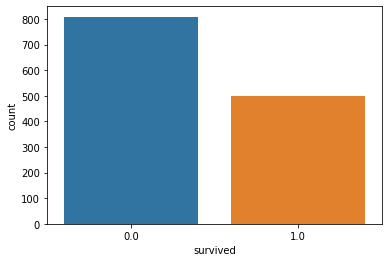

In [7]:
sns.countplot(x="survived",data=veri)

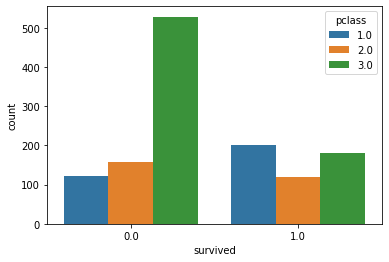

In [8]:
sns.countplot(x="survived",hue="pclass",data=veri)

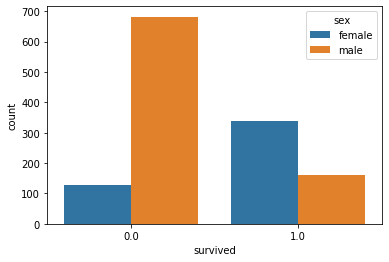

In [9]:
sns.countplot(x="survived",hue="sex",data=veri)

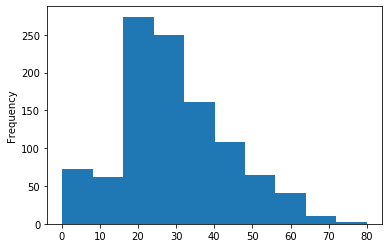

In [10]:
veri["age"].plot.hist()

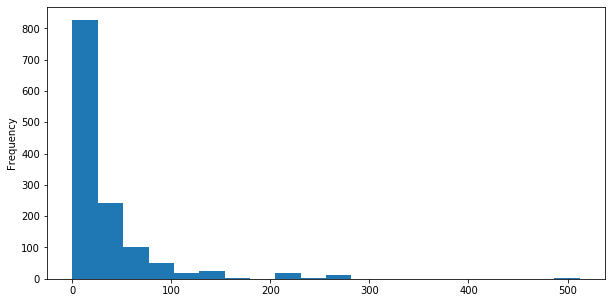

In [11]:
veri["fare"].plot.hist(bins=20,figsize=(10,5))

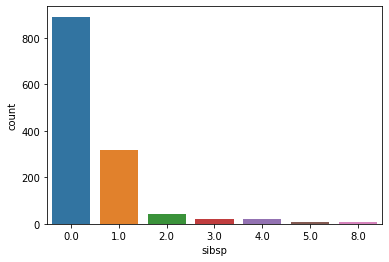

In [12]:
sns.countplot(x="sibsp",data=veri)

In [14]:
veri.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

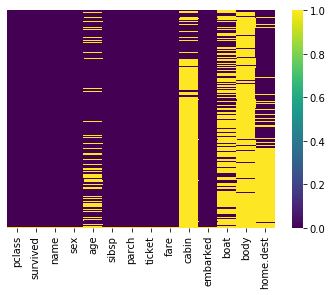

In [15]:
sns.heatmap(veri.isnull(),yticklabels=False,cmap="viridis")

## Preprocessing the data

In [16]:
veri.drop(["cabin","boat","body","home.dest"],axis=1,inplace=True)

In [17]:
veri.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [18]:
veri.isnull().sum()

pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
ticket        1
fare          2
embarked      3
dtype: int64

In [19]:
veri.dropna(inplace=True)

In [20]:
veri.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [21]:
veri.dtypes

pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
dtype: object

In [22]:
sex=pd.get_dummies(veri["sex"],drop_first=True)

In [23]:
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


In [24]:
veri.embarked.value_counts()

S    781
C    212
Q     50
Name: embarked, dtype: int64

In [25]:
embarked=pd.get_dummies(veri["embarked"],drop_first=True)

In [26]:
pclass=pd.get_dummies(veri["pclass"],drop_first=True)

In [28]:
veri.drop(["sex","embarked","pclass"],axis=1,inplace=True)

In [30]:
veri=pd.concat([veri,sex,embarked,pclass],axis=1)

In [31]:
veri.dtypes

survived    float64
name         object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
male          uint8
Q             uint8
S             uint8
2.0           uint8
3.0           uint8
dtype: object

In [33]:
veri.drop(["name","ticket"],axis=1,inplace=True)

In [34]:
veri.head()

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [35]:
X=veri.drop("survived",axis=1)
y=veri["survived"]

## Building the model

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=100)

In [39]:
from sklearn.linear_model import LogisticRegression

In [42]:
lg_model=LogisticRegression(max_iter=1000)

In [43]:
lg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluating the model

In [44]:
lg_model.score(X_test,y_test)

0.7701149425287356

In [45]:
lg_model.score(X_train,y_train)

0.8081841432225064

## Tuning the hyperparameters

In [49]:
lg_model=LogisticRegression(C=0.1,max_iter=1000)
lg_model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
print(lg_model.score(X_test,y_test))
print(lg_model.score(X_train,y_train))

0.7816091954022989
0.7953964194373402


In [51]:
from sklearn.metrics import confusion_matrix

## Predicting the data

In [52]:
tahmin=lg_model.predict(X_test)

In [53]:
confusion_matrix(y_test,tahmin)

array([[124,  21],
       [ 36,  80]], dtype=int64)

In [54]:
veri.head()

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [57]:
import numpy as np
yeni_veri=np.array([[29,0,0,211.3375,0,0,1,0,0]])

In [58]:
lg_model.predict(yeni_veri)

array([1.])

In [59]:
lg_model.coef_

array([[-0.03164997, -0.32005828,  0.06664671,  0.0064837 , -1.80769546,
        -0.41992741, -0.37328606, -0.18082597, -1.02543165]])

In [60]:
yeni_veri2=np.array([[30,1,1,150,0,0,1,0,0]])
lg_model.predict(yeni_veri2)

array([1.])

Don't forget to follow on [Tirendaz Academy YouTube](https://www.youtube.com/tirendazakademi), [YouTube (ENG)](https://www.youtube.com/channel/UCFU9Go20p01kC64w-tmFORw), [Twitter](https://twitter.com/TirendazAcademy), [Medium (TR)](https://tirendazakademi.medium.com), [Medium (ENG)](https://tirendazacademy.medium.com), [GitHub](https://github.com/TirendazAcademy), [LinkedIn](https://www.linkedin.com/in/tirendaz-academy), [Udemy](https://www.udemy.com/user/tirendaz-akademi-2/)